# Oleaster (Eleagnus angustifolia) coverage investigation in the South Heves Grasslands Landscape Protection Area in 2023

## Importing libraries

In [1]:
import geopandas
import matplotlib.pyplot as pyplot
import pandas
import numpy

from src.calculate_statistics import AreaStatisticsComparisonWithSampleArea
from src.utils.file_utils import write_csv_from_dict

## Setting up the input data

In [2]:
oleasters_basic_data = geopandas.read_file('../data/ezustfa_manual_digit.gpkg', layer='ezustfa_manual_digit')
sample_area_basic_data = geopandas.read_file('../data/hatasterulet.gpkg', layer='hatasterulet_singlepart')

## Get sample area size in $m^2$

In [3]:
ludas_supbparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('tarna')]
rakottyas_subparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('pely')]

subpart_areas = {
    'ludas': ludas_supbparts.geometry.area.sum(),
    'rakottyas': rakottyas_subparts.geometry.area.sum()
}
print(subpart_areas)

{'ludas': 5613195.774895668, 'rakottyas': 1757293.8048941833}


## Spatial join the oleaster data with the sample areas

In [4]:
oleasters = oleasters_basic_data.sjoin(sample_area_basic_data, how='left', predicate='intersects')

## Remove oleasters outside the study area and remove the unnecessary columns

In [5]:
oleasters.dropna(subset=['subpart_name'], inplace=True)
oleasters.drop(
    columns=['category', 'area_left', 'estimated_individuals', 'index_right', 'fejlesztes', 'area_right'],
    axis=1,
    inplace=True)
print(oleasters.columns)
print(oleasters.head(5))

Index(['geometry', 'subpart_name'], dtype='object')
                                            geometry      subpart_name
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02


## Calculate the area of the oleaster polygons in $m^2$

In [6]:
oleasters['area'] = oleasters.geometry.area

## Create dataframe for the two separated sample areas

In [7]:
ludas = oleasters[oleasters['subpart_name'].str.startswith('tarna')]
rakottyas = oleasters[oleasters['subpart_name'].str.startswith('pely')]
print(ludas.head(5))
print(rakottyas.head(5))

                                            geometry      subpart_name  \
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02   
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02   
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02   
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02   
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02   

         area  
0    6.738424  
1   26.876360  
2  226.426230  
3  437.066467  
4   19.900229  
                                             geometry        subpart_name  \
7   POLYGON ((744568.667 244353.825, 744570.899 24...  pely_ezustfa_01-02   
10  POLYGON ((744601.368 244366.737, 744601.641 24...  pely_ezustfa_01-02   
11  POLYGON ((744519.753 244364.027, 744523.214 24...  pely_ezustfa_01-02   
14  POLYGON ((744536.057 244350.728, 744537.970 24...  pely_ezustfa_01-02   
15  POLYGON ((744562.018 244341.893, 744563.657 24...  pely_ezustfa_01-02 

## Calculate statistics

In [8]:
oleasters_statistics = AreaStatisticsComparisonWithSampleArea(oleasters, subpart_areas['ludas'] + subpart_areas['rakottyas'])
ludas_statistics = AreaStatisticsComparisonWithSampleArea(ludas, subpart_areas['ludas'])
rakottyas_statistics = AreaStatisticsComparisonWithSampleArea(rakottyas, subpart_areas['rakottyas'])
print('Statistics for all sample areas')
print(oleasters_statistics.get_area_statistics())
print('Statistics for Ludas sample area')
print(ludas_statistics.get_area_statistics())
print('Statistics for Rakottyas sample area')
print(rakottyas_statistics.get_area_statistics())

Statistics for all sample areas
{'sum': 139301.57289901393, 'count': 1269, 'mean': 109.77271308038922, 'median': 37.40357533628124, 'std': 307.3942775632389, 'minimum': 0.39495606443404835, 'first_quartile': 13.537664095935124, 'second_quartile': 37.40357533628124, 'third_quartile': 92.37866889549393, 'jenks': [215.12704924562556, 782.8658243967652, 2576.215276210259], 'equal_interval': 1421.1997025772728, 'equal_interval_breaks': [1421.594658641707, 2842.7943612189797, 4263.994063796253], 'maximum': 5685.193766373525, 'sample_area_size': 7370489.579789851, 'experimental_area_ratio': 1.889990771861124}
Statistics for Ludas sample area
{'sum': 101315.55848202194, 'count': 831, 'mean': 121.92004630808897, 'median': 38.883300189377984, 'std': 357.5945960268639, 'minimum': 0.5398059108270392, 'first_quartile': 15.71703456440053, 'second_quartile': 38.883300189377984, 'third_quartile': 97.56318703376414, 'jenks': [203.64485151721988, 782.8658243967652, 2576.215276210259], 'equal_interval': 

## Write statistics to csv

In [9]:
write_csv_from_dict(oleasters_statistics.get_area_statistics(), '../results/area_statistics/oleasters_statistics.csv')
write_csv_from_dict(ludas_statistics.get_area_statistics(), '../results/area_statistics/ludas_statistics.csv')
write_csv_from_dict(rakottyas_statistics.get_area_statistics(), '../results/area_statistics/rakottyas_statistics.csv')

## Classify polygons by area size based on natural breaks (Fisher-Jenks Algorithm), equal intervals and quartiles

In [10]:
oleasters_statistics.add_classifications_to_data()
ludas_statistics.add_classifications_to_data()
rakottyas_statistics.add_classifications_to_data()

## Write classified data to geopackage

In [11]:
oleasters_statistics.data.to_file('../results/gis_data/oleasters.gpkg', layer='oleasters', driver='GPKG')
ludas_statistics.data.to_file('../results/gis_data/oleasters.gpkg', layer='ludas', driver='GPKG')
rakottyas_statistics.data.to_file('../results/gis_data/oleasters.gpkg', layer='rakottyas', driver='GPKG')

## Jenks' classification analysis

### Create statistics by natural break categories

In [12]:
# TODO: Create functions for this
jenks_category_counts_ludas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('tarna')]['jenks']).value_counts()
jenks_category_counts_rakottyas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('pely')]['jenks']).value_counts()
jenks_category_counts_oleasters = pandas.Series(oleasters['jenks']).value_counts()
jenks_sum_areas_by_categories_oleasters = pandas.Series(oleasters.groupby('jenks')['area'].sum())
jenks_sum_areas_by_categories_ludas = pandas.Series(oleasters[oleasters['subpart_name'].str.startswith('tarna')].groupby('jenks')['area'].sum())
jenks_sum_areas_by_categories_rakottyas = pandas.Series(oleasters[oleasters['subpart_name'].str.startswith('pely')].groupby('jenks')['area'].sum())
jenks_area_ratio_by_categories_oleasters_on_sample_area = (jenks_sum_areas_by_categories_oleasters / (subpart_areas['ludas'] + subpart_areas['rakottyas'])) * 100
jenks_area_ratio_by_categories_ludas_on_sample_area = (jenks_sum_areas_by_categories_ludas / subpart_areas['ludas']) * 100
jenks_area_ratio_by_categories_rakottyas_on_sample_area = (jenks_sum_areas_by_categories_rakottyas / subpart_areas['rakottyas']) * 100
jenks_area_ratio_by_categories_oleaster_on_infected_area = (jenks_sum_areas_by_categories_oleasters / oleasters['area'].sum()) * 100
jenks_area_ratio_by_categories_ludas_on_infected_area = (jenks_sum_areas_by_categories_ludas / ludas['area'].sum()) * 100
jenks_area_ratio_by_categories_rakottyas_on_infected_area = (jenks_sum_areas_by_categories_rakottyas / rakottyas['area'].sum()) * 100
print('Jenks category counts for Ludas')
print(jenks_category_counts_ludas)
print('Jenks category counts for Rakottyas')
print(jenks_category_counts_rakottyas)
print('Jenks category counts for Oleasters')
print(jenks_category_counts_oleasters)
print('Jenks sum areas by categories for Oleasters')
print(jenks_sum_areas_by_categories_oleasters)
print('Jenks sum areas by categories for Ludas')
print(jenks_sum_areas_by_categories_ludas)
print('Jenks sum areas by categories for Rakottyas')
print(jenks_sum_areas_by_categories_rakottyas)
print('Jenks area ratio by categories for Oleasters on sample area')
print(jenks_area_ratio_by_categories_oleasters_on_sample_area)
print('Jenks area ratio by categories for Ludas on sample area')
print(jenks_area_ratio_by_categories_ludas_on_sample_area)
print('Jenks area ratio by categories for Rakottyas on sample area')
print(jenks_area_ratio_by_categories_rakottyas_on_sample_area)
print('Jenks area ratio by categories for Oleasters on infected area')
print(jenks_area_ratio_by_categories_oleaster_on_infected_area)
print('Jenks area ratio by categories for Ludas on infected area')
print(jenks_area_ratio_by_categories_ludas_on_infected_area)
print('Jenks area ratio by categories for Rakottyas on infected area')
print(jenks_area_ratio_by_categories_rakottyas_on_infected_area)

Jenks category counts for Ludas
jenks
A    729
B     82
C     17
D      3
Name: count, dtype: int64
Jenks category counts for Rakottyas
jenks
A    403
B     29
C      6
Name: count, dtype: int64
Jenks category counts for Oleasters
jenks
A    1132
B     111
C      23
D       3
Name: count, dtype: int64
Jenks sum areas by categories for Oleasters
jenks
A    53704.768937
B    42715.901429
C    28084.240078
D    14796.662454
Name: area, dtype: float64
Jenks sum areas by categories for Ludas
jenks
A    34692.517566
B    31066.318915
C    20760.059546
D    14796.662454
Name: area, dtype: float64
Jenks sum areas by categories for Rakottyas
jenks
A    19012.251371
B    11649.582514
C     7324.180532
Name: area, dtype: float64
Jenks area ratio by categories for Oleasters on sample area
jenks
A    0.728646
B    0.579553
C    0.381036
D    0.200755
Name: area, dtype: float64
Jenks area ratio by categories for Ludas on sample area
jenks
A    0.618053
B    0.553452
C    0.369844
D    0.263605
Name:

### Create dataframe from the natural break statistics

In [13]:
oleasters_jenks_statistics = pandas.DataFrame()
oleasters_jenks_statistics['categories'] = jenks_category_counts_oleasters.index
oleasters_jenks_statistics['count'] = jenks_category_counts_oleasters.values
oleasters_jenks_statistics['area'] = jenks_sum_areas_by_categories_oleasters.values
oleasters_jenks_statistics['area_ratio_on_sample_area'] = jenks_area_ratio_by_categories_oleasters_on_sample_area.values
oleasters_jenks_statistics['area_ratio_on_infected_area'] = jenks_area_ratio_by_categories_oleaster_on_infected_area.values
oleasters_jenks_statistics.sort_values(by=['categories'], inplace=True)
ludas_jenks_statistics = pandas.DataFrame()
ludas_jenks_statistics['categories'] = jenks_category_counts_ludas.index
ludas_jenks_statistics['count'] = jenks_category_counts_ludas.values
ludas_jenks_statistics['area'] = jenks_sum_areas_by_categories_ludas.values
ludas_jenks_statistics['area_ratio_on_sample_area'] = jenks_area_ratio_by_categories_ludas_on_sample_area.values
ludas_jenks_statistics['area_ratio_on_infected_area'] = jenks_area_ratio_by_categories_ludas_on_infected_area.values
ludas_jenks_statistics.sort_values(by=['categories'], inplace=True)
rakottyas_jenks_statistics = pandas.DataFrame()
rakottyas_jenks_statistics['categories'] = jenks_category_counts_rakottyas.index
rakottyas_jenks_statistics['count'] = jenks_category_counts_rakottyas.values
rakottyas_jenks_statistics['area'] = jenks_sum_areas_by_categories_rakottyas.values
rakottyas_jenks_statistics['area_ratio_on_sample_area'] = jenks_area_ratio_by_categories_rakottyas_on_sample_area.values
rakottyas_jenks_statistics['area_ratio_on_infected_area'] = jenks_area_ratio_by_categories_rakottyas_on_infected_area.values
rakottyas_jenks_statistics.sort_values(by=['categories'], inplace=True)
print('Oleasters jenks statistics')
print(oleasters_jenks_statistics)
print('Ludas jenks statistics')
print(ludas_jenks_statistics)
print('Rakottyas jenks statistics')
print(rakottyas_jenks_statistics)

Oleasters jenks statistics
  categories  count          area  area_ratio_on_sample_area  \
0          A   1132  53704.768937                   0.728646   
1          B    111  42715.901429                   0.579553   
2          C     23  28084.240078                   0.381036   
3          D      3  14796.662454                   0.200755   

   area_ratio_on_infected_area  
0                    38.552881  
1                    30.664335  
2                    20.160749  
3                    10.622035  
Ludas jenks statistics
  categories  count          area  area_ratio_on_sample_area  \
0          A    729  34692.517566                   0.618053   
1          B     82  31066.318915                   0.553452   
2          C     17  20760.059546                   0.369844   
3          D      3  14796.662454                   0.263605   

   area_ratio_on_infected_area  
0                    34.242043  
1                    30.662930  
2                    20.490495  
3          

### Write natural break statistics to csv

In [14]:
oleasters_jenks_statistics.to_csv('../results/area_statistics/oleasters_jenks_statistics.csv', index=False)
ludas_jenks_statistics.to_csv('../results/area_statistics/ludas_jenks_statistics.csv', index=False)
rakottyas_jenks_statistics.to_csv('../results/area_statistics/rakottyas_jenks_statistics.csv', index=False)

### Create diagram for natural break statistics

#### Oleasters

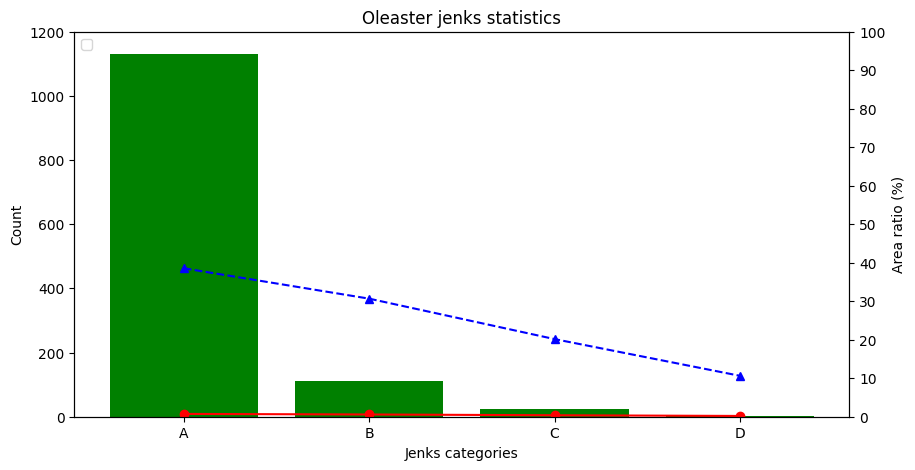

In [15]:
oleasters_jenks_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(oleasters_jenks_statistics['categories'], oleasters_jenks_statistics['count'], color='green')
ax.set_title('Oleaster jenks statistics')
ax.set_xlabel('Jenks categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 4, 1))
ax.set_xticklabels(oleasters_jenks_statistics['categories'])
ax.set_ylim(0, 1200)
ax.set_yticks(numpy.arange(0, 1201, 200))
ax.set_yticklabels(numpy.arange(0, 1201, 200))
ax2 = ax.twinx()
ax2.plot(oleasters_jenks_statistics['categories'], oleasters_jenks_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(oleasters_jenks_statistics['categories'], oleasters_jenks_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.savefig('../results/diagrams/oleasters_jenks_statistics.png', dpi=300, bbox_inches='tight')
pyplot.show()

#### Ludas

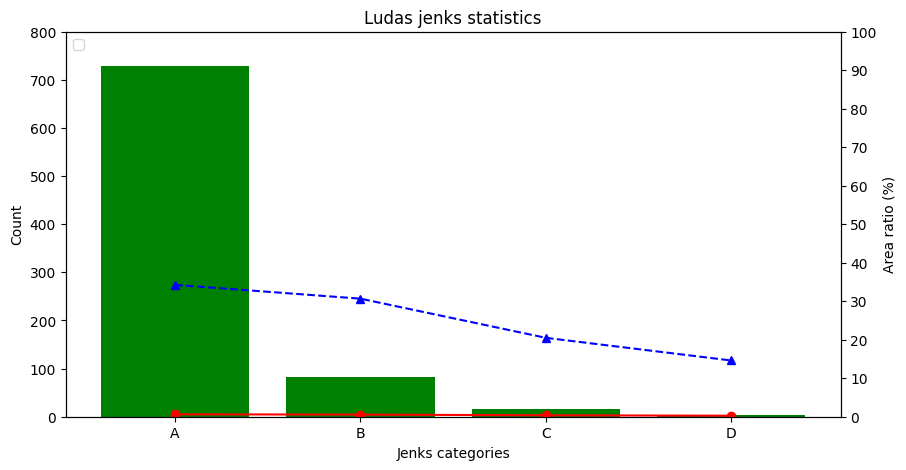

In [16]:
ludas_jenks_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(ludas_jenks_statistics['categories'], ludas_jenks_statistics['count'], color='green')
ax.set_title('Ludas jenks statistics')
ax.set_xlabel('Jenks categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 4, 1))
ax.set_xticklabels(ludas_jenks_statistics['categories'])
ax.set_ylim(0, 800)
ax.set_yticks(numpy.arange(0, 801, 100))
ax.set_yticklabels(numpy.arange(0, 801, 100))
ax2 = ax.twinx()
ax2.plot(ludas_jenks_statistics['categories'], ludas_jenks_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(ludas_jenks_statistics['categories'], ludas_jenks_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.savefig('../results/diagrams/ludas_jenks_statistics.png', dpi=300, bbox_inches='tight')
pyplot.show()

#### Rakottyas

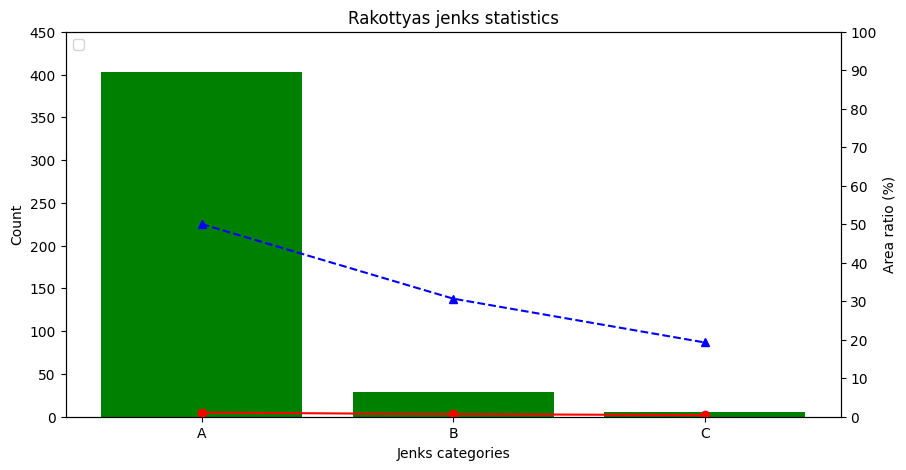

In [17]:
rakottyas_jenks_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(rakottyas_jenks_statistics['categories'], rakottyas_jenks_statistics['count'], color='green')
ax.set_title('Rakottyas jenks statistics')
ax.set_xlabel('Jenks categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 3, 1))
ax.set_xticklabels(rakottyas_jenks_statistics['categories'])
ax.set_ylim(0, 450)
ax.set_yticks(numpy.arange(0, 451, 50))
ax.set_yticklabels(numpy.arange(0, 451, 50))
ax2 = ax.twinx()
ax2.plot(rakottyas_jenks_statistics['categories'], rakottyas_jenks_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(rakottyas_jenks_statistics['categories'], rakottyas_jenks_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.savefig('../results/diagrams/rakottyas_jenks_statistics.png', dpi=300, bbox_inches='tight')
pyplot.show()

## Equal interval classification analysis

In [18]:
# TODO: Create functions for this
equal_interval_category_counts_ludas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('tarna')]['equal_interval_breaks']).value_counts()
equal_interval_category_counts_rakottyas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('pely')]['equal_interval_breaks']).value_counts()
equal_interval_category_counts_oleasters = pandas.Series(oleasters['equal_interval_breaks']).value_counts()
equal_interval_sum_areas_by_categories_oleasters = pandas.Series(oleasters.groupby('equal_interval_breaks')['area'].sum())
equal_interval_sum_areas_by_categories_ludas = pandas.Series(oleasters[oleasters['subpart_name'].str.startswith('tarna')].groupby('equal_interval_breaks')['area'].sum())
equal_interval_sum_areas_by_categories_rakottyas = pandas.Series(oleasters[oleasters['subpart_name'].str.startswith('pely')].groupby('equal_interval_breaks')['area'].sum())
equal_interval_area_ratio_by_categories_oleasters_on_sample_area = (equal_interval_sum_areas_by_categories_oleasters / (subpart_areas['ludas'] + subpart_areas['rakottyas'])) * 100
equal_interval_area_ratio_by_categories_ludas_on_sample_area = (equal_interval_sum_areas_by_categories_ludas / subpart_areas['ludas']) * 100
equal_interval_area_ratio_by_categories_rakottyas_on_sample_area = (equal_interval_sum_areas_by_categories_rakottyas / subpart_areas['rakottyas']) * 100
equal_interval_area_ratio_by_categories_oleasters_on_infected_area = (equal_interval_sum_areas_by_categories_oleasters / oleasters['area'].sum()) * 100
equal_interval_area_ratio_by_categories_ludas_on_infected_area = (equal_interval_sum_areas_by_categories_ludas / ludas['area'].sum()) * 100
equal_interval_area_ratio_by_categories_rakottyas_on_infected_area = (equal_interval_sum_areas_by_categories_rakottyas / rakottyas['area'].sum()) * 100
print('equal_interval category counts for Ludas')
print(equal_interval_category_counts_ludas)
print('equal_interval category counts for Rakottyas')
print(equal_interval_category_counts_rakottyas)
print('equal_interval category counts for Oleasters')
print(equal_interval_category_counts_oleasters)
print('equal_interval sum areas by categories for Oleasters')
print(equal_interval_sum_areas_by_categories_oleasters)
print('equal_interval sum areas by categories for Ludas')
print(equal_interval_sum_areas_by_categories_ludas)
print('equal_interval sum areas by categories for Rakottyas')
print(equal_interval_sum_areas_by_categories_rakottyas)
print('equal_interval area ratio by categories for Oleasters on sample area')
print(equal_interval_area_ratio_by_categories_oleasters_on_sample_area)
print('equal_interval area ratio by categories for Ludas on sample area')
print(equal_interval_area_ratio_by_categories_ludas_on_sample_area)
print('equal_interval area ratio by categories for Rakottyas on sample area')
print(equal_interval_area_ratio_by_categories_rakottyas_on_sample_area)
print('equal_interval area ratio by categories for Oleasters on infected area')
print(equal_interval_area_ratio_by_categories_oleasters_on_infected_area)
print('equal_interval area ratio by categories for Ludas on infected area')
print(equal_interval_area_ratio_by_categories_ludas_on_infected_area)
print('equal_interval area ratio by categories for Rakottyas on infected area')
print(equal_interval_area_ratio_by_categories_rakottyas_on_infected_area)

equal_interval category counts for Ludas
equal_interval_breaks
A    824
B      4
D      3
Name: count, dtype: int64
equal_interval category counts for Rakottyas
equal_interval_breaks
A    436
B      2
Name: count, dtype: int64
equal_interval category counts for Oleasters
equal_interval_breaks
A    1260
B       6
D       3
Name: count, dtype: int64
equal_interval sum areas by categories for Oleasters
equal_interval_breaks
A    114452.896285
B     10052.014160
D     14796.662454
Name: area, dtype: float64
equal_interval sum areas by categories for Ludas
equal_interval_breaks
A    79454.542678
B     7064.353350
D    14796.662454
Name: area, dtype: float64
equal_interval sum areas by categories for Rakottyas
equal_interval_breaks
A    34998.353607
B     2987.660810
Name: area, dtype: float64
equal_interval area ratio by categories for Oleasters on sample area
equal_interval_breaks
A    1.552853
B    0.136382
D    0.200755
Name: area, dtype: float64
equal_interval area ratio by categories f

### Create dataframes for equal interval statistics

In [19]:
oleasters_equal_interval_statistics = pandas.DataFrame()
oleasters_equal_interval_statistics['categories'] = equal_interval_category_counts_oleasters.index
oleasters_equal_interval_statistics['count'] = equal_interval_category_counts_oleasters.values
oleasters_equal_interval_statistics['area'] = equal_interval_sum_areas_by_categories_oleasters.values
oleasters_equal_interval_statistics['area_ratio_on_sample_area'] = equal_interval_area_ratio_by_categories_oleasters_on_sample_area.values
oleasters_equal_interval_statistics['area_ratio_on_infected_area'] = equal_interval_area_ratio_by_categories_oleasters_on_infected_area.values
oleasters_equal_interval_statistics.sort_values(by=['categories'], inplace=True)
ludas_equal_interval_statistics = pandas.DataFrame()
ludas_equal_interval_statistics['categories'] = equal_interval_category_counts_ludas.index
ludas_equal_interval_statistics['count'] = equal_interval_category_counts_ludas.values
ludas_equal_interval_statistics['area'] = equal_interval_sum_areas_by_categories_ludas.values
ludas_equal_interval_statistics['area_ratio_on_sample_area'] = equal_interval_area_ratio_by_categories_ludas_on_sample_area.values
ludas_equal_interval_statistics['area_ratio_on_infected_area'] = equal_interval_area_ratio_by_categories_ludas_on_infected_area.values
ludas_equal_interval_statistics.sort_values(by=['categories'], inplace=True)
rakottyas_equal_interval_statistics = pandas.DataFrame()
rakottyas_equal_interval_statistics['categories'] = equal_interval_category_counts_rakottyas.index
rakottyas_equal_interval_statistics['count'] = equal_interval_category_counts_rakottyas.values
rakottyas_equal_interval_statistics['area'] = equal_interval_sum_areas_by_categories_rakottyas.values
rakottyas_equal_interval_statistics['area_ratio_on_sample_area'] = equal_interval_area_ratio_by_categories_rakottyas_on_sample_area.values
rakottyas_equal_interval_statistics['area_ratio_on_infected_area'] = equal_interval_area_ratio_by_categories_rakottyas_on_infected_area.values
rakottyas_equal_interval_statistics.sort_values(by=['categories'], inplace=True)
print('Oleaster equal interval statistics')
print(oleasters_equal_interval_statistics)
print('Ludas equal interval statistics')
print(ludas_equal_interval_statistics)
print('Rakottyas equal interval statistics')
print(rakottyas_equal_interval_statistics)

Oleaster equal interval statistics
  categories  count           area  area_ratio_on_sample_area  \
0          A   1260  114452.896285                   1.552853   
1          B      6   10052.014160                   0.136382   
2          D      3   14796.662454                   0.200755   

   area_ratio_on_infected_area  
0                    82.161955  
1                     7.216009  
2                    10.622035  
Ludas equal interval statistics
  categories  count          area  area_ratio_on_sample_area  \
0          A    824  79454.542678                   1.415496   
1          B      4   7064.353350                   0.125853   
2          D      3  14796.662454                   0.263605   

   area_ratio_on_infected_area  
0                    78.422844  
1                     6.972624  
2                    14.604531  
Rakottyas equal interval statistics
  categories  count          area  area_ratio_on_sample_area  \
0          A    436  34998.353607                  

### Write equal interval statistics to csv

In [20]:
oleasters_equal_interval_statistics.to_csv('../results/area_statistics/oleasters_equal_interval_statistics.csv', index=False)
ludas_equal_interval_statistics.to_csv('../results/area_statistics/ludas_equal_interval_statistics.csv', index=False)
rakottyas_equal_interval_statistics.to_csv('../results/area_statistics/rakottyas_equal_interval_statistics.csv', index=False)

### Create diagrams for equal interval statistics

#### Oleasters

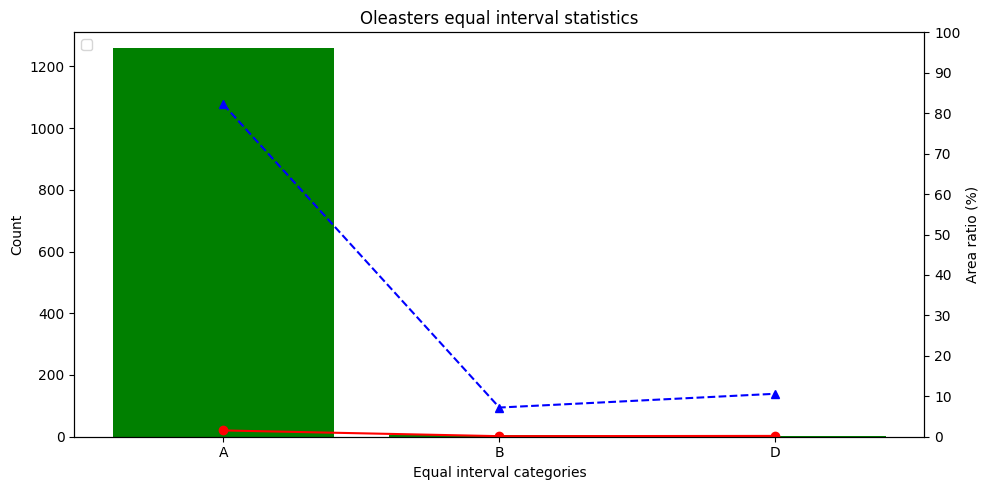

In [21]:
oleasters_equal_interval_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(oleasters_equal_interval_statistics['categories'], oleasters_equal_interval_statistics['count'], color='green')
ax.set_title('Oleasters equal interval statistics')
ax.set_xlabel('Equal interval categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 3, 1))
ax.set_xticklabels(oleasters_equal_interval_statistics['categories'])
ax.set_ylim(0, 1310)
ax.set_yticks(numpy.arange(0, 1311, 200))
ax.set_yticklabels(numpy.arange(0, 1311, 200))
ax2 = ax.twinx()
ax2.plot(oleasters_equal_interval_statistics['categories'], oleasters_equal_interval_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(oleasters_equal_interval_statistics['categories'], oleasters_equal_interval_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/oleasters_equal_interval_statistics.png')
pyplot.show()

#### Ludas

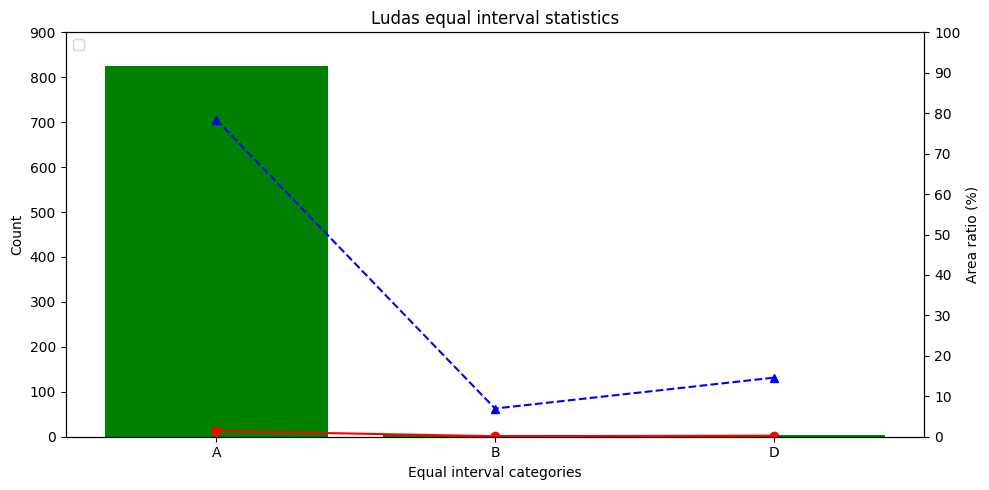

In [22]:
ludas_equal_interval_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(ludas_equal_interval_statistics['categories'], ludas_equal_interval_statistics['count'], color='green')
ax.set_title('Ludas equal interval statistics')
ax.set_xlabel('Equal interval categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 3, 1))
ax.set_xticklabels(ludas_equal_interval_statistics['categories'])
ax.set_ylim(0, 900)
ax.set_yticks(numpy.arange(0, 901, 100))
ax.set_yticklabels(numpy.arange(0, 901, 100))
ax2 = ax.twinx()
ax2.plot(ludas_equal_interval_statistics['categories'], ludas_equal_interval_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(ludas_equal_interval_statistics['categories'], ludas_equal_interval_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/ludas_equal_interval_statistics.png')
pyplot.show()

#### Rakottyas

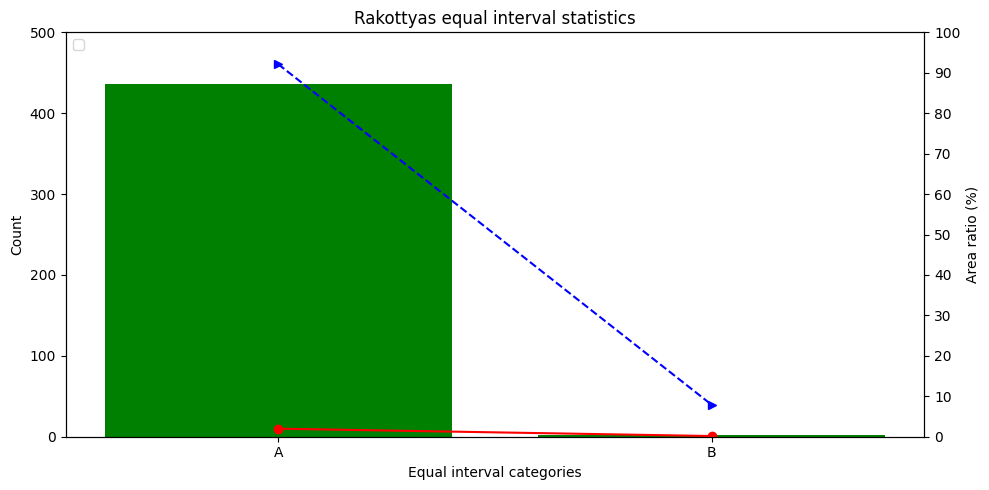

In [23]:
rakottyas_equal_interval_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(rakottyas_equal_interval_statistics['categories'], rakottyas_equal_interval_statistics['count'], color='green')
ax.set_title('Rakottyas equal interval statistics')
ax.set_xlabel('Equal interval categories')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 2, 1))
ax.set_xticklabels(rakottyas_equal_interval_statistics['categories'])
ax.set_ylim(0, 500)
ax.set_yticks(numpy.arange(0, 501, 100))
ax.set_yticklabels(numpy.arange(0, 501, 100))
ax2 = ax.twinx()
ax2.plot(rakottyas_equal_interval_statistics['categories'], rakottyas_equal_interval_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(rakottyas_equal_interval_statistics['categories'], rakottyas_equal_interval_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='>')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/rakottyas_equal_interval_statistics.png')
pyplot.show()

## Quartile classification analysis

### Calculate quartile statistics

In [24]:
quartile_category_counts_oleasters = pandas.Series(oleasters['quartiles']).value_counts()
quartile_category_counts_ludas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('tarna')]['quartiles']).value_counts()
quartile_category_counts_rakottyas = pandas.Series(
    oleasters[oleasters['subpart_name'].str.startswith('pely')]['quartiles']).value_counts()
quartile_sum_areas_by_categories_oleasters = oleasters.groupby('quartiles')['area'].sum()
quartile_sum_areas_by_categories_ludas = oleasters[oleasters['subpart_name'].str.startswith('tarna')].groupby(
    'quartiles')['area'].sum()
quartile_sum_areas_by_categories_rakottyas = oleasters[oleasters['subpart_name'].str.startswith('pely')].groupby(
    'quartiles')['area'].sum()
quartile_area_ratio_by_categories_oleasters_on_sample_area = (quartile_sum_areas_by_categories_oleasters / (subpart_areas['ludas'] + subpart_areas['rakottyas'])) * 100
quartile_area_ratio_by_categories_ludas_on_sample_area = (quartile_sum_areas_by_categories_ludas / subpart_areas['ludas']) * 100
quartile_area_ratio_by_categories_rakottyas_on_sample_area = (quartile_sum_areas_by_categories_rakottyas / subpart_areas['rakottyas']) * 100
quartile_area_ratio_by_categories_oleasters_on_infected_area = (quartile_sum_areas_by_categories_oleasters / oleasters['area'].sum()) * 100
quartile_area_ratio_by_categories_ludas_on_infected_area = (quartile_sum_areas_by_categories_ludas / oleasters[oleasters['subpart_name'].str.startswith('tarna')]['area'].sum()) * 100
quartile_area_ratio_by_categories_rakottyas_on_infected_area = (quartile_sum_areas_by_categories_rakottyas / oleasters[oleasters['subpart_name'].str.startswith('pely')]['area'].sum()) * 100
print('Oleaster quartile statistics')
print(quartile_category_counts_oleasters)
print(quartile_sum_areas_by_categories_oleasters)
print(quartile_area_ratio_by_categories_oleasters_on_sample_area)
print(quartile_area_ratio_by_categories_oleasters_on_infected_area)
print('Ludas quartile statistics')
print(quartile_category_counts_ludas)
print(quartile_sum_areas_by_categories_ludas)
print(quartile_area_ratio_by_categories_ludas_on_sample_area)
print(quartile_area_ratio_by_categories_ludas_on_infected_area)
print('Rakottyas quartile statistics')
print(quartile_category_counts_rakottyas)
print(quartile_sum_areas_by_categories_rakottyas)
print(quartile_area_ratio_by_categories_rakottyas_on_sample_area)
print(quartile_area_ratio_by_categories_rakottyas_on_infected_area)

Oleaster quartile statistics
quartiles
A    318
B    317
D    317
C    317
Name: count, dtype: int64
quartiles
A      2108.476408
B      7639.984734
C     19060.956106
D    110492.155651
Name: area, dtype: float64
quartiles
A    0.028607
B    0.103656
C    0.258612
D    1.499116
Name: area, dtype: float64
quartiles
A     1.513606
B     5.484493
C    13.683231
D    79.318671
Name: area, dtype: float64
Ludas quartile statistics
quartiles
D    218
B    216
C    210
A    187
Name: count, dtype: int64
quartiles
A     1391.681111
B     5229.038143
C    12573.730671
D    82121.108558
Name: area, dtype: float64
quartiles
A    0.024793
B    0.093156
C    0.224003
D    1.463001
Name: area, dtype: float64
quartiles
A     1.373610
B     5.161140
C    12.410464
D    81.054785
Name: area, dtype: float64
Rakottyas quartile statistics
quartiles
A    131
C    107
B    101
D     99
Name: count, dtype: int64
quartiles
A      716.795297
B     2410.946591
C     6487.225435
D    28371.047093
Name: area, dty

### Create dataframes for quartile statistics

In [25]:
oleasters_quartile_statistics = pandas.DataFrame()
oleasters_quartile_statistics['categories'] = quartile_category_counts_oleasters.index
oleasters_quartile_statistics['count'] = quartile_category_counts_oleasters.values
oleasters_quartile_statistics['area'] = quartile_sum_areas_by_categories_oleasters.values
oleasters_quartile_statistics['area_ratio_on_sample_area'] = quartile_area_ratio_by_categories_oleasters_on_sample_area.values
oleasters_quartile_statistics['area_ratio_on_infected_area'] = quartile_area_ratio_by_categories_oleasters_on_infected_area.values
oleasters_quartile_statistics.sort_values(by=['categories'], inplace=True)
ludas_quartile_statistics = pandas.DataFrame()
ludas_quartile_statistics['categories'] = quartile_category_counts_ludas.index
ludas_quartile_statistics['count'] = quartile_category_counts_ludas.values
ludas_quartile_statistics['area'] = quartile_sum_areas_by_categories_ludas.values
ludas_quartile_statistics['area_ratio_on_sample_area'] = quartile_area_ratio_by_categories_ludas_on_sample_area.values
ludas_quartile_statistics['area_ratio_on_infected_area'] = quartile_area_ratio_by_categories_ludas_on_infected_area.values
ludas_quartile_statistics.sort_values(by=['categories'], inplace=True)
rakottyas_quartile_statistics = pandas.DataFrame()
rakottyas_quartile_statistics['categories'] = quartile_category_counts_rakottyas.index
rakottyas_quartile_statistics['count'] = quartile_category_counts_rakottyas.values
rakottyas_quartile_statistics['area'] = quartile_sum_areas_by_categories_rakottyas.values
rakottyas_quartile_statistics['area_ratio_on_sample_area'] = quartile_area_ratio_by_categories_rakottyas_on_sample_area.values
rakottyas_quartile_statistics['area_ratio_on_infected_area'] = quartile_area_ratio_by_categories_rakottyas_on_infected_area.values
rakottyas_quartile_statistics.sort_values(by=['categories'], inplace=True)

### Write quartile statistics to csv

In [26]:
oleasters_quartile_statistics.to_csv('../results/area_statistics/oleasters_quartile_statistics.csv', index=False)
ludas_quartile_statistics.to_csv('../results/area_statistics/ludas_quartile_statistics.csv', index=False)
rakottyas_quartile_statistics.to_csv('../results/area_statistics/rakottyas_quartile_statistics.csv', index=False)

## Create diagrams for quartile statistics

#### Oleasters

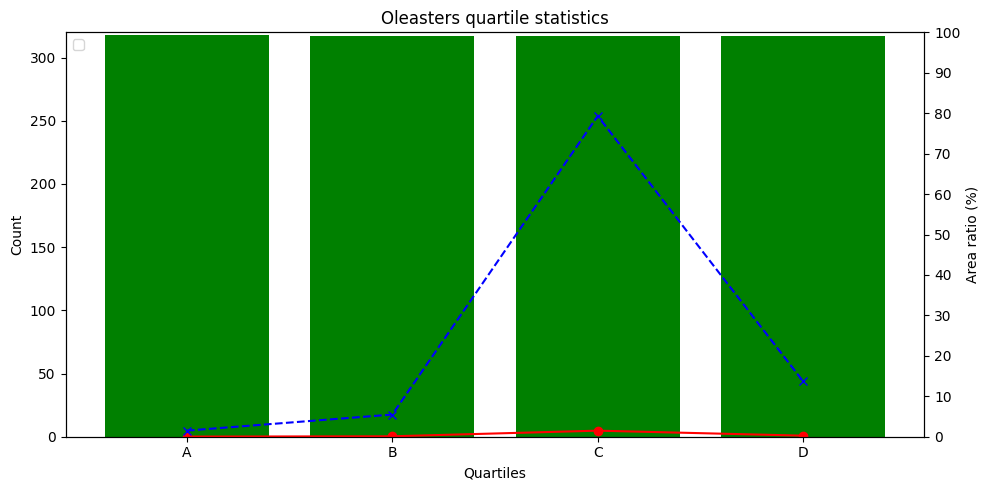

In [27]:
oleasters_quartile_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(oleasters_quartile_statistics['categories'], oleasters_quartile_statistics['count'], color='green')
ax.set_title('Oleasters quartile statistics')
ax.set_xlabel('Quartiles')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 4, 1))
ax.set_xticklabels(oleasters_quartile_statistics['categories'])
ax.set_ylim(0, 320)
ax.set_yticks(numpy.arange(0, 321, 50))
ax.set_yticklabels(numpy.arange(0, 321, 50))
ax2 = ax.twinx()
ax2.plot(oleasters_quartile_statistics['categories'], oleasters_quartile_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(oleasters_quartile_statistics['categories'], oleasters_quartile_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='x')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/oleasters_quartile_statistics.png')
pyplot.show()

#### Ludas

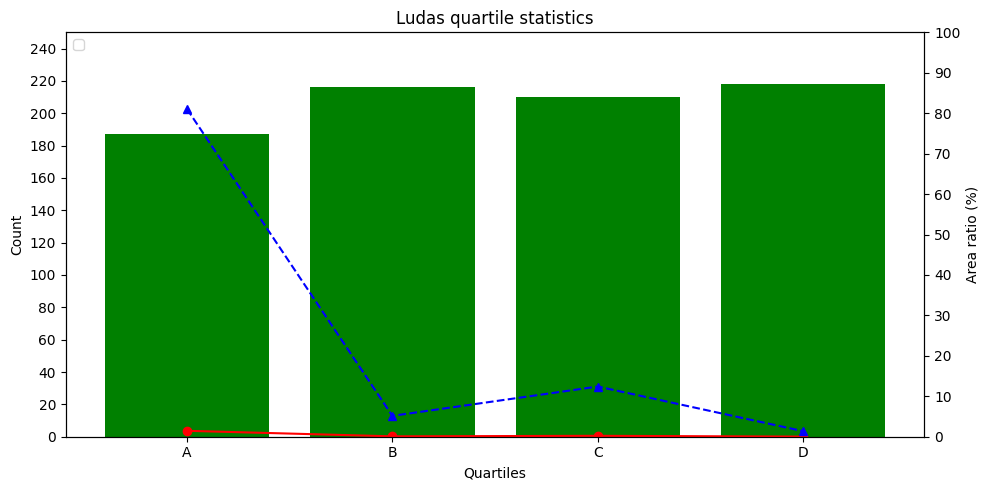

In [28]:
ludas_quartile_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(ludas_quartile_statistics['categories'], ludas_quartile_statistics['count'], color='green')
ax.set_title('Ludas quartile statistics')
ax.set_xlabel('Quartiles')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 4, 1))
ax.set_xticklabels(ludas_quartile_statistics['categories'])
ax.set_ylim(0, 250)
ax.set_yticks(numpy.arange(0, 251, 20))
ax.set_yticklabels(numpy.arange(0, 251, 20))
ax2 = ax.twinx()
ax2.plot(ludas_quartile_statistics['categories'], ludas_quartile_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(ludas_quartile_statistics['categories'], ludas_quartile_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/ludas_quartile_statistics.png')
pyplot.show()

#### Rakottyas

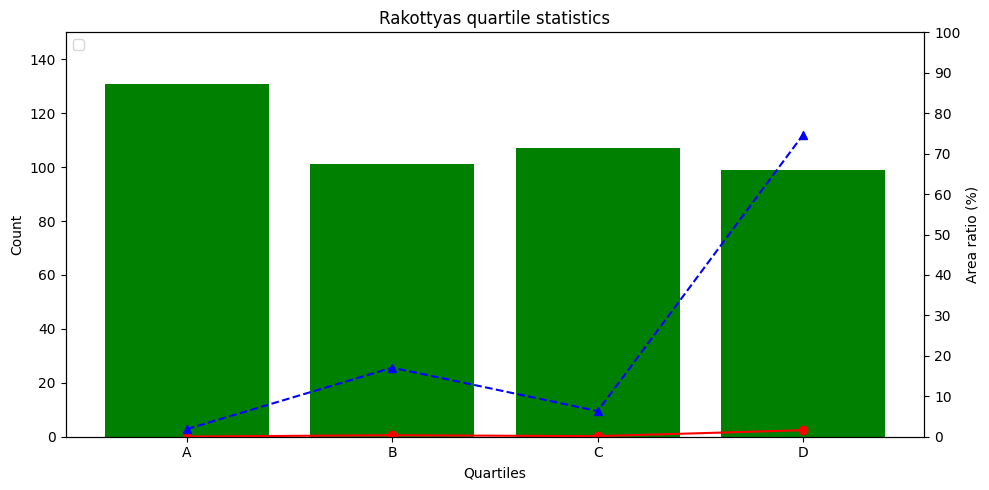

In [29]:
rakottyas_quartile_statistics_fig, ax = pyplot.subplots(figsize=(10, 5))
ax.bar(rakottyas_quartile_statistics['categories'], rakottyas_quartile_statistics['count'], color='green')
ax.set_title('Rakottyas quartile statistics')
ax.set_xlabel('Quartiles')
ax.set_ylabel('Count')
ax.set_xticks(numpy.arange(0, 4, 1))
ax.set_xticklabels(rakottyas_quartile_statistics['categories'])
ax.set_ylim(0, 150)
ax.set_yticks(numpy.arange(0, 151, 20))
ax.set_yticklabels(numpy.arange(0, 151, 20))
ax2 = ax.twinx()
ax2.plot(rakottyas_quartile_statistics['categories'], rakottyas_quartile_statistics['area_ratio_on_sample_area'], color='red', marker='o')
ax2.plot(rakottyas_quartile_statistics['categories'], rakottyas_quartile_statistics['area_ratio_on_infected_area'], color='blue', linestyle='dashed', marker='^')
ax2.set_ylabel('Area ratio (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks(numpy.arange(0, 101, 10))
ax2.set_yticklabels(numpy.arange(0, 101, 10))
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')
pyplot.tight_layout()
pyplot.savefig('../results/diagrams/rakottyas_quartile_statistics.png')
pyplot.show()
